In [4]:
from sys import argv

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.metrics import RocCurveDisplay, accuracy_score, confusion_matrix, PrecisionRecallDisplay, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, LeavePGroupsOut
complete_features=[
        "AF1",
        "AF2",
        "AF3",
        "AF4",
        "AF5",
        "BLOSUM1",
        "BLOSUM2",
        "BLOSUM3",
        "BLOSUM4",
        "BLOSUM5",
        "BLOSUM6",
        "BLOSUM7",
        "BLOSUM8",
        "BLOSUM9",
        "BLOSUM10",
        "PP1",
        "PP2",
        "PP3",
        "F1",
        "F2",
        "F3",
        "F4",
        "F5",
        "F6",
        "KF1",
        "KF2",
        "KF3",
        "KF4",
        "KF5",
        "KF6",
        "KF7",
        "KF8",
        "KF9",
        "KF10",
        "MSWHIM1",
        "MSWHIM2",
        "MSWHIM3",
        "E1",
        "E2",
        "E3",
        "E4",
        "E5",
        "PD1",
        "PD2",
        "PRIN1",
        "PRIN2",
        "PRIN3",
        "ProtFP1",
        "ProtFP2",
        "ProtFP3",
        "ProtFP4",
        "ProtFP5",
        "ProtFP6",
        "ProtFP7",
        "ProtFP8",
        "SV1",
        "SV2",
        "SV3",
        "SV4",
        "ST1",
        "ST2",
        "ST3",
        "ST4",
        "ST5",
        "ST6",
        "ST7",
        "ST8",
        "SVGER1",
        "SVGER2",
        "SVGER3",
        "SVGER4",
        "SVGER5",
        "SVGER6",
        "SVGER7",
        "SVGER8",
        "SVGER9",
        "SVGER10",
        "SVGER11",
        "T1",
        "T2",
        "T3",
        "T4",
        "T5",
        "VHSE1",
        "VHSE2",
        "VHSE3",
        "VHSE4",
        "VHSE5",
        "VHSE6",
        "VHSE7",
        "VHSE8",
        "VSTPV1",
        "VSTPV2",
        "VSTPV3",
        "VSTPV4",
        "VSTPV5",
        "VSTPV6",
        "Z1",
        "Z2",
        "Z3",
        "Z4",
        "Z5",
        "cys30",
        "cys20",
        "cys_ser30",
        "cys_ser20",
        "charge",
        "avgcharge",
        "avghydrop",
        "length",
        "entropy",
        "entropyratio",
        "boman",
        "instability",
        "aliphatic",
        "A",
        "R",
        "N",
        "D",
        "C",
        "E",
        "Q",
        "G",
        "H",
        "I",
        "L",
        "K",
        "M",
        "F",
        "P",
        "S",
        "T",
        "W",
        "Y",
        "V",
        "RHK",
        "DE",
        "STNQ",
        "CGP",
        "AVIL",
        "MFYW",
    ]
original_features=[
        "cys30",
        "cys20",
        "cys_ser30",
        "cys_ser20",
        "charge",
        "avgcharge",
        "avghydrop",
        "length",
        "entropy",
        "entropyratio",
        "boman",
        "instability",
        "aliphatic",
        "A",
        "R",
        "N",
        "D",
        "C",
        "E",
        "Q",
        "G",
        "H",
        "I",
        "L",
        "K",
        "M",
        "F",
        "P",
        "S",
        "T",
        "W",
        "Y",
        "V",
        "RHK",
        "DE",
        "STNQ",
        "CGP",
        "AVIL",
        "MFYW"
    ]


In [5]:
def svm_training_split(dataset_file,feature_list):
    dataset = pd.read_csv(dataset_file)
    dataset = dataset.drop(labels="sequence", axis=1)
    x = dataset[feature_list]
    y = dataset[["RiPP"]].to_numpy().ravel()
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2,random_state=42)
    return x_train, x_test, y_train, y_test


def f_importances(coef, names):
    imp = coef
    imp, names = zip(*sorted(zip(imp, names, strict=False)), strict=False)
    fig=plt.figure(figsize=(5,5),dpi=300)
    plt.barh(range(len(names)), imp, align="center")
    plt.yticks(range(len(names)), names, fontsize=3)
    plt.title('Feature coefficients')
    plt.show()
    
def svc_classification(x_train, x_test, y_train, y_test,feature_list):
    linear_svc = svm.SVC(kernel="linear",random_state=0)
    linear_svc.fit(x_train, y_train)
    f_importances(abs(linear_svc.coef_[0]),feature_list)
    y_pred = linear_svc.predict(x_test)
    print(
        pd.DataFrame(
            confusion_matrix(y_test, y_pred),
            index=linear_svc.classes_,
            columns=linear_svc.classes_,
        )
    )
    ax = plt.gca()
    RocCurveDisplay.from_estimator(
        linear_svc, x_test, y_test, name="Validation data", ax=ax, alpha=0.8
    )
    RocCurveDisplay.from_estimator(linear_svc,x_train,y_train,name='Training data', ax=ax,alpha=0.8)
    plt.show()
    
    ax=plt.gca()
    PrecisionRecallDisplay.from_estimator(linear_svc,x_test,y_test,name='Validation data',ax=ax, alpha=0.8)
    PrecisionRecallDisplay.from_estimator(linear_svc,x_train,y_train,name='Training data',ax=ax, alpha=0.8)
    plt.show()
    
    ConfusionMatrixDisplay.from_estimator(linear_svc,x_test,y_test)
    plt.show()

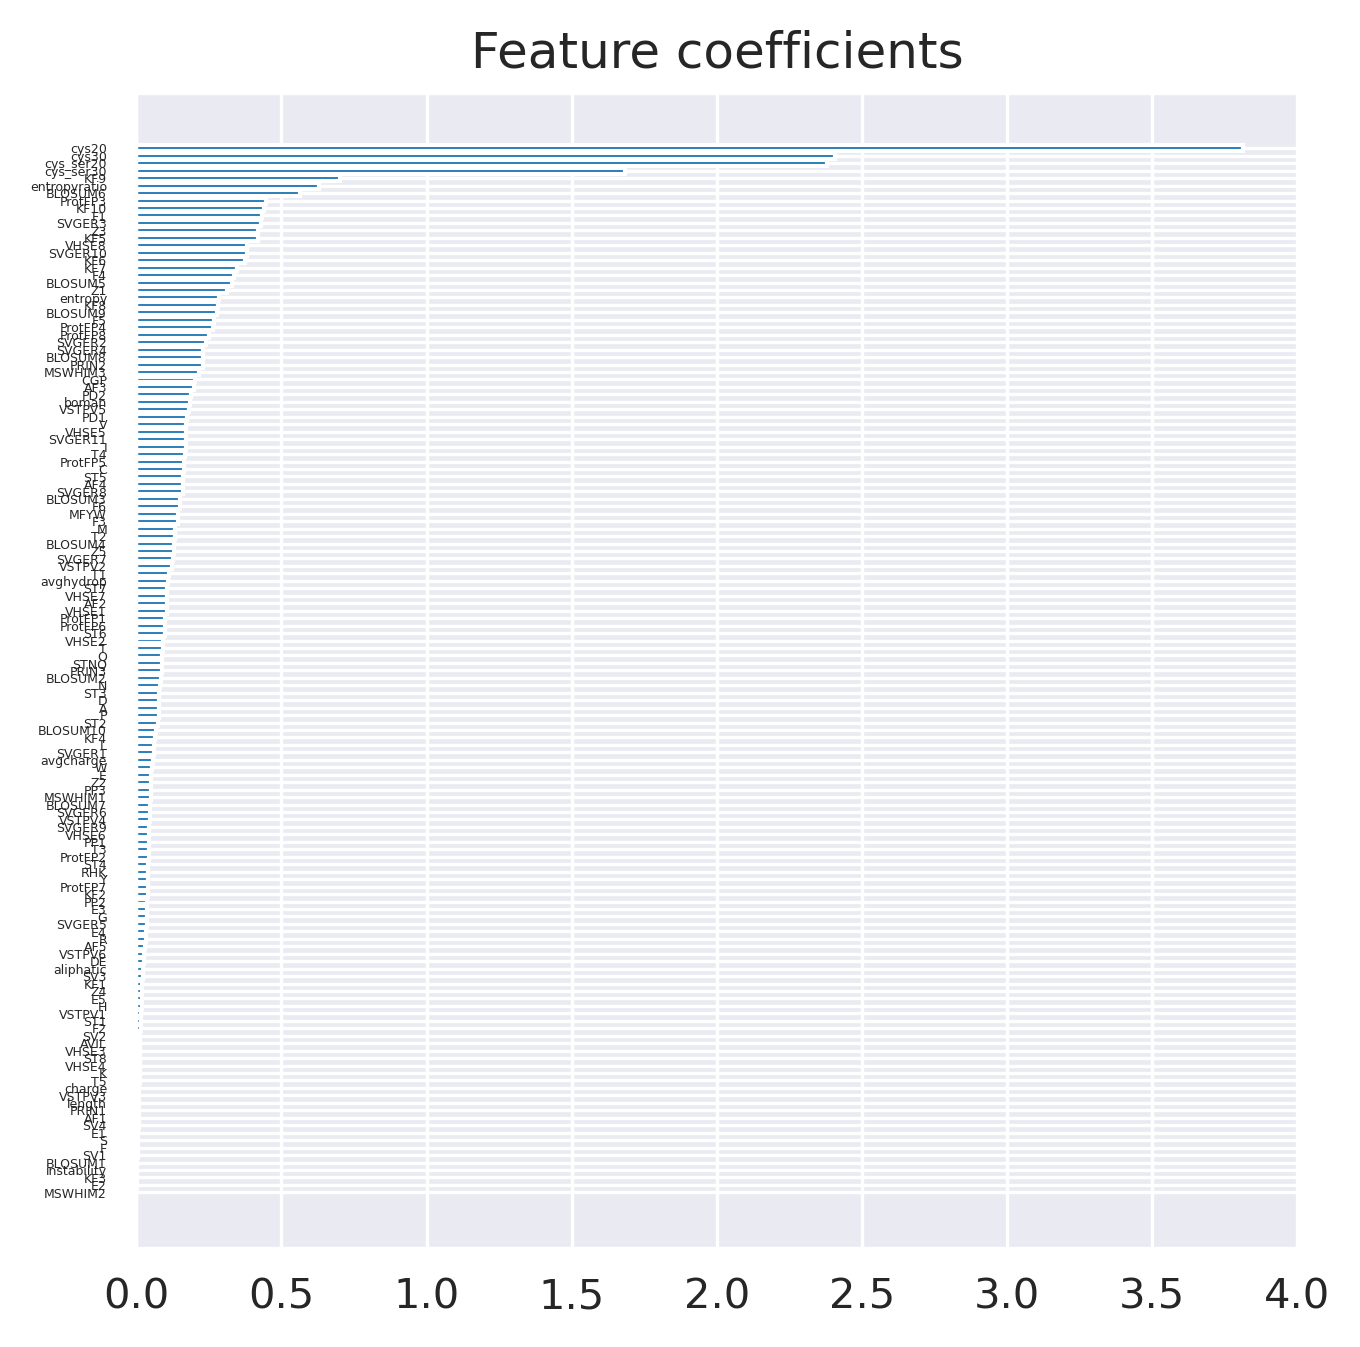

         No_RiPP  RiPP
No_RiPP     4000     1
RiPP          90    10


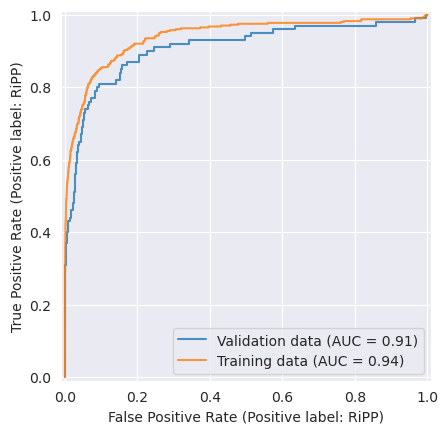

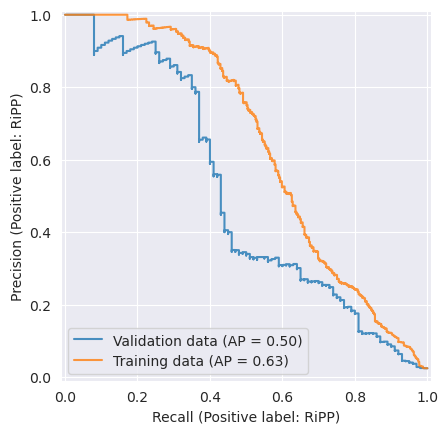

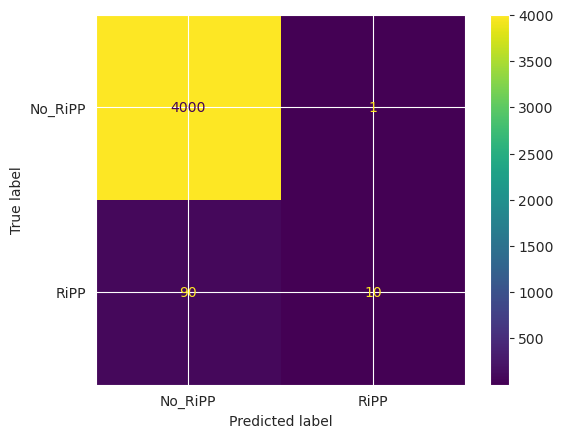

In [6]:
x_train, x_test, y_train, y_test = svm_training_split('/lustre/BIF/nobackup/sanz006/training_dataset.csv',feature_list=complete_features)
svc_classification(x_train, x_test, y_train, y_test,feature_list=complete_features)

Same dataset but using the original features + Boman, aliphatic and instability

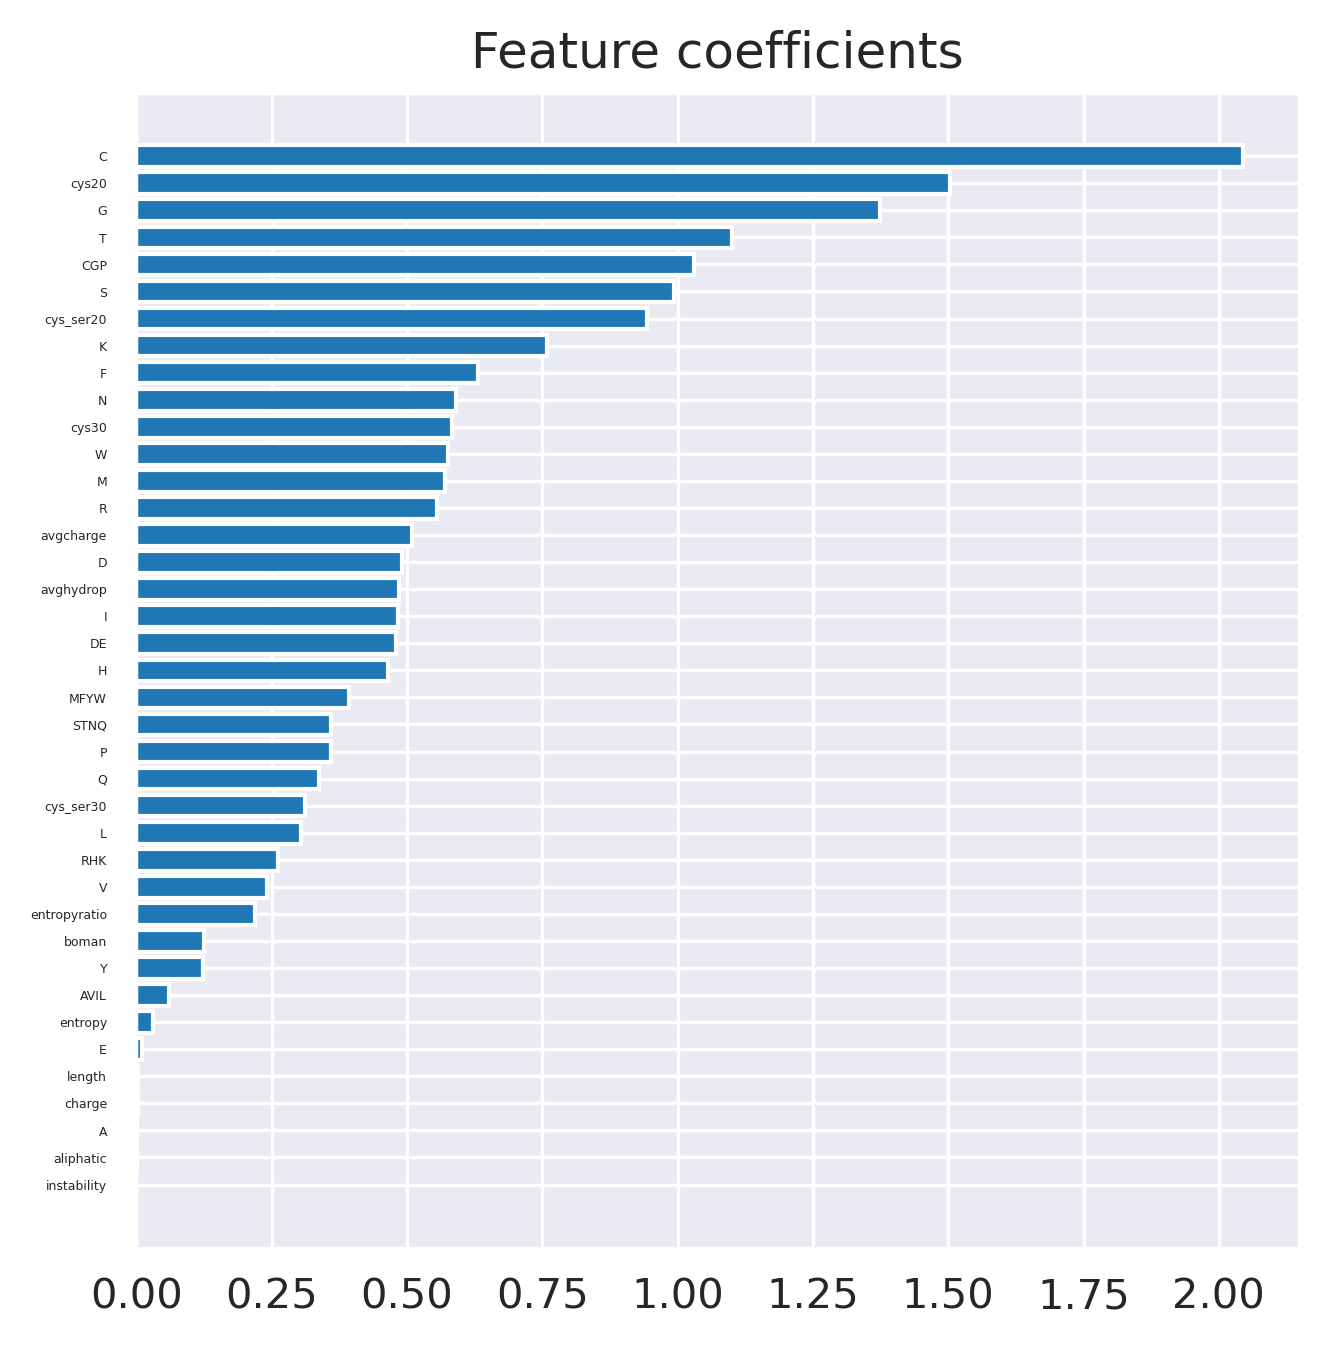

         No_RiPP  RiPP
No_RiPP     4001     0
RiPP         100     0


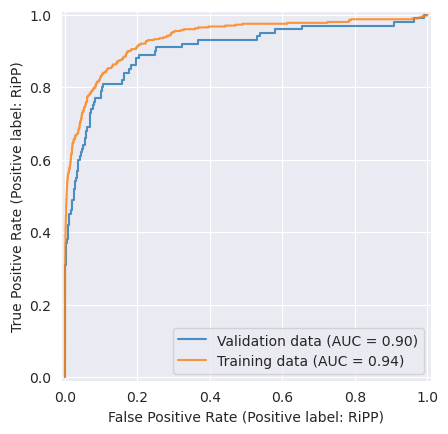

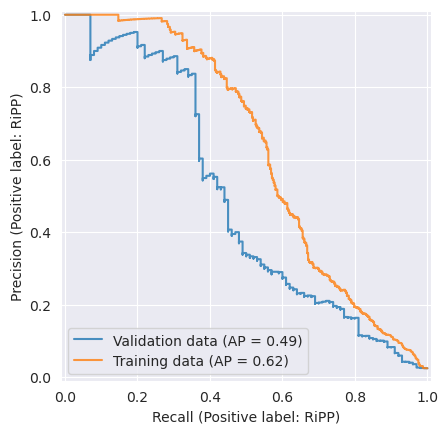

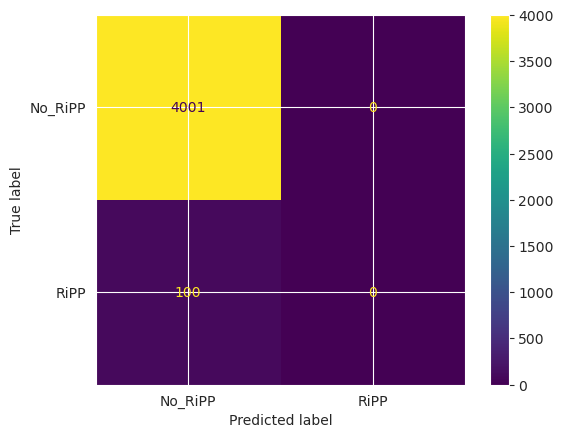

In [7]:
x_train, x_test, y_train, y_test = svm_training_split('/lustre/BIF/nobackup/sanz006/training_dataset.csv',feature_list=original_features)
svc_classification(x_train, x_test, y_train, y_test,feature_list=original_features)

Next cells will make an attempt to determine whether the increase in our dataset (500 proteins) vs the original paper (137 proteins) has had a positive effect

In [8]:
def svm_training_split_reduced(dataset_file,feature_list):
    dataset = pd.read_csv(dataset_file)
    dataset = dataset.drop(labels="sequence", axis=1)
    dataset=dataset.iloc[364:]
    x = dataset[feature_list]
    y = dataset[["RiPP"]].to_numpy().ravel()
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2,random_state=42)
    return x_train, x_test, y_train, y_test

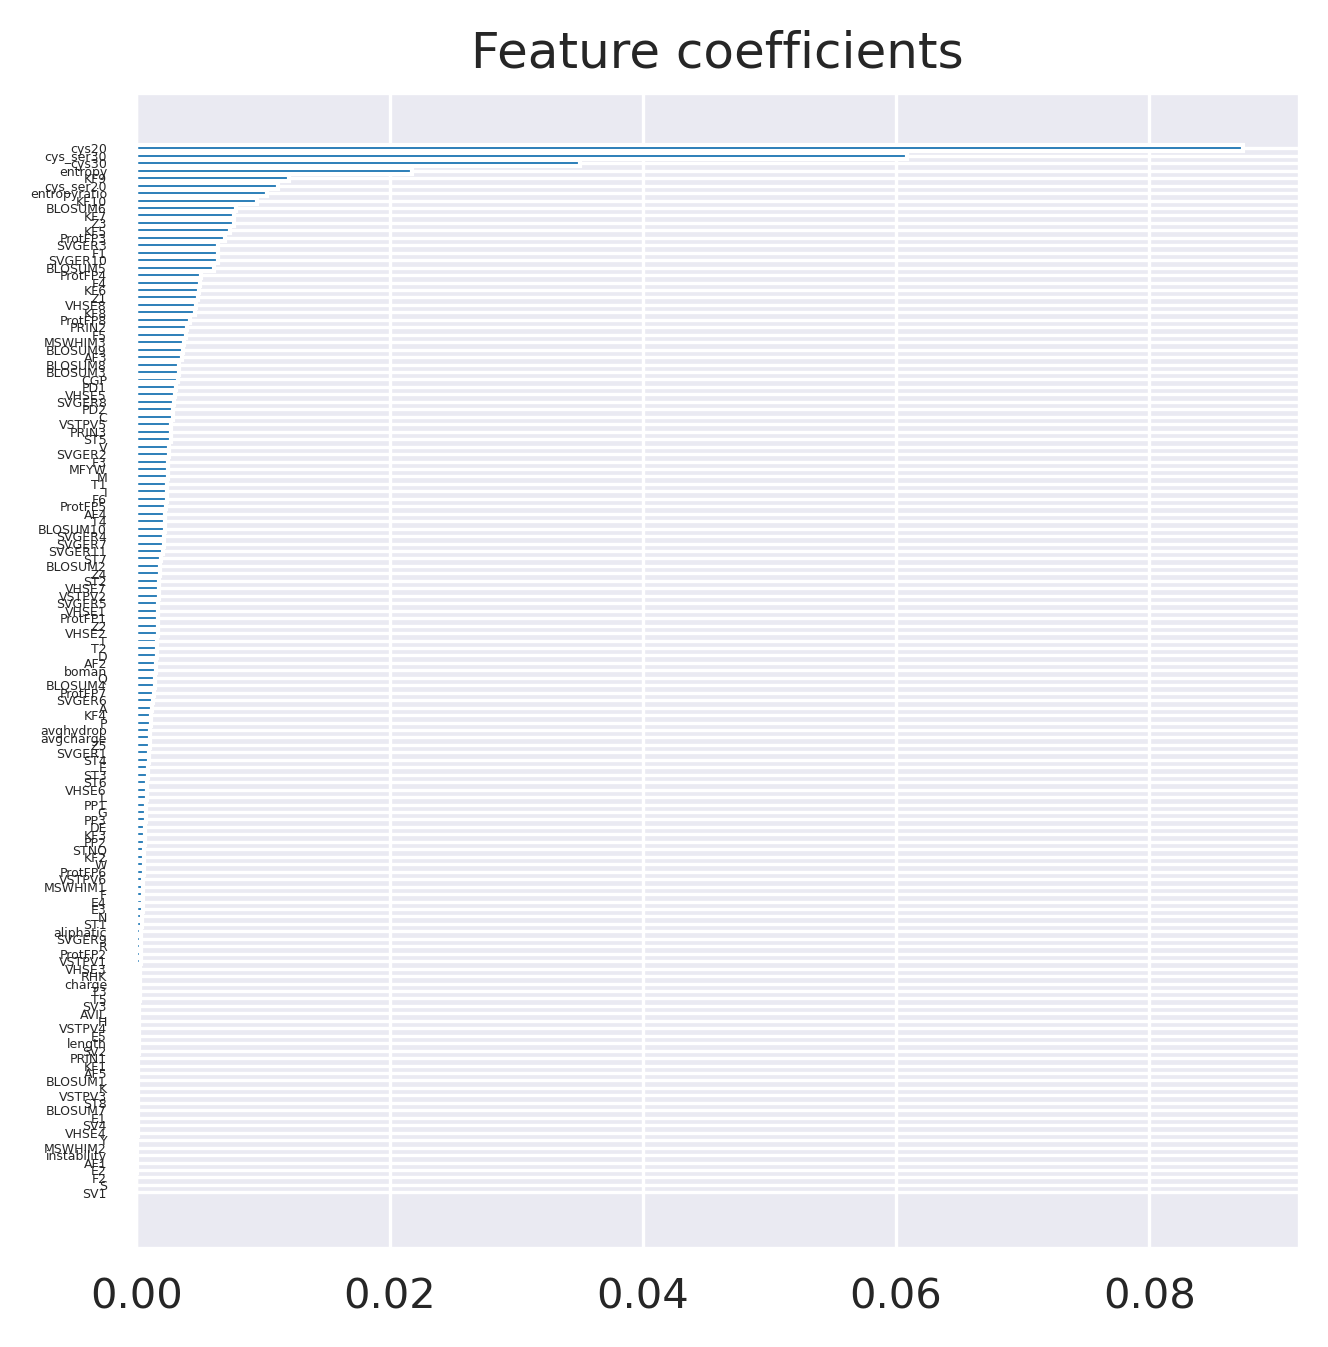

         No_RiPP  RiPP
No_RiPP     4001     0
RiPP          27     0


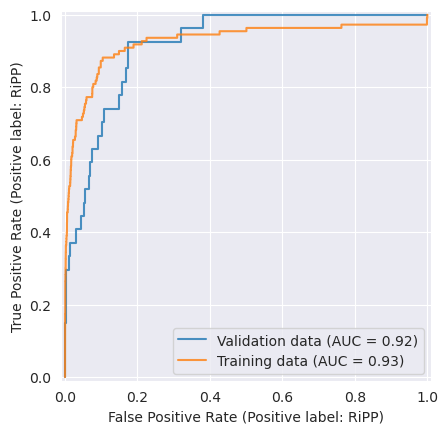

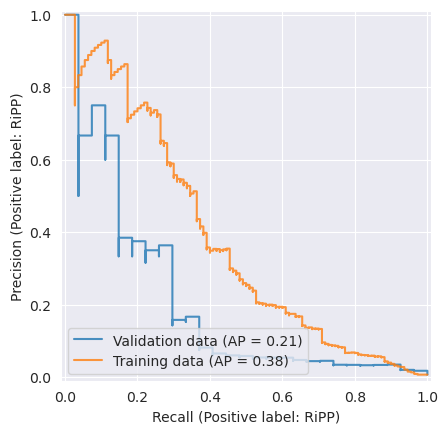

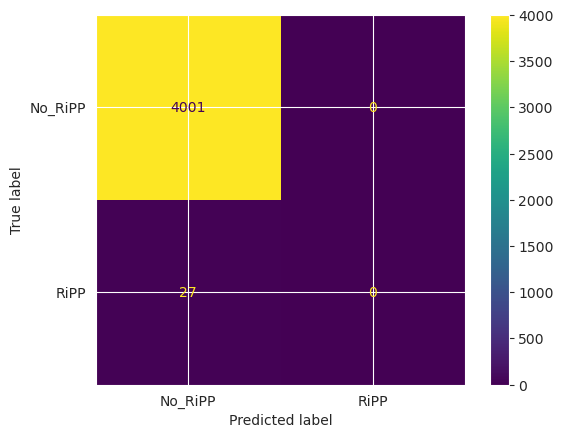

In [9]:
x_train, x_test, y_train, y_test = svm_training_split_reduced('/lustre/BIF/nobackup/sanz006/training_dataset.csv',feature_list=complete_features)
svc_classification(x_train, x_test, y_train, y_test,feature_list=complete_features)

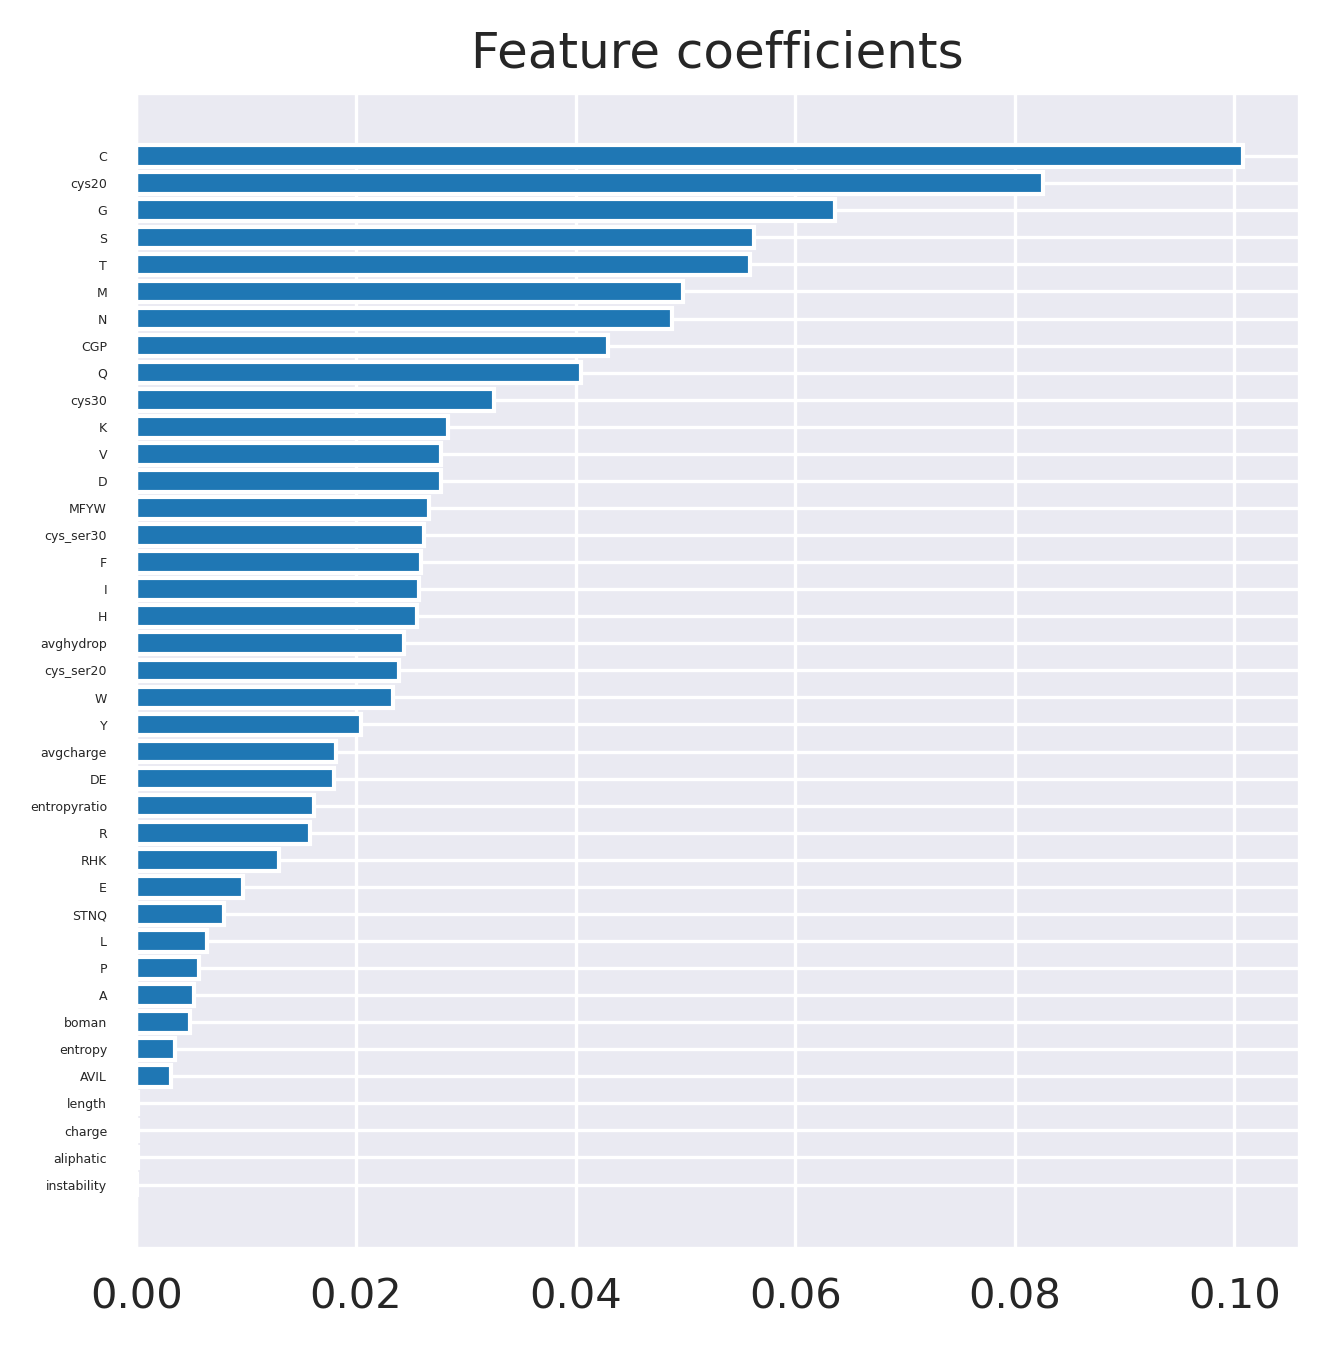

         No_RiPP  RiPP
No_RiPP     4001     0
RiPP          27     0


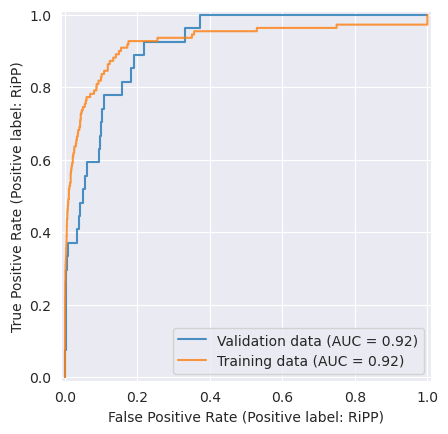

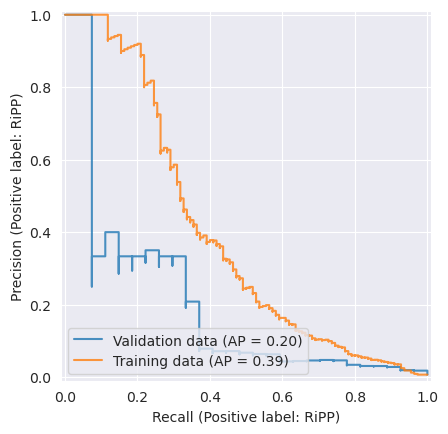

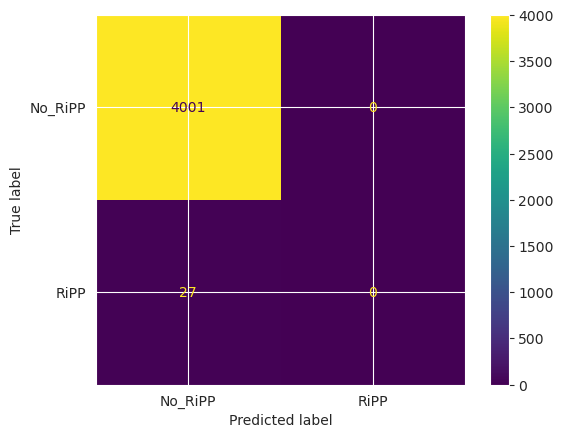

In [10]:
x_train, x_test, y_train, y_test = svm_training_split_reduced('/lustre/BIF/nobackup/sanz006/training_dataset.csv',feature_list=original_features)
svc_classification(x_train, x_test, y_train, y_test,feature_list=original_features)

Now we will use fewer features based on the feature importance plots